Assignment 02
Data Wrangling
Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better

Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. Apply data transformations on at least one of the variables.
Apply data transformations on at least one of the variables. The purpose of this: understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dataset.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df = df.rename(columns = {
    "race/ethnicity" : "race",
    "parental level of education"   : "parental_education",
    "test preparation course" : "test_preparation",
    "math score" : "math_score",
    "reading score" : "reading_score",
    "writing score" : "writing_score"
})

In [8]:
df.head()

,gender,race,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: ylabel='writing_score'>

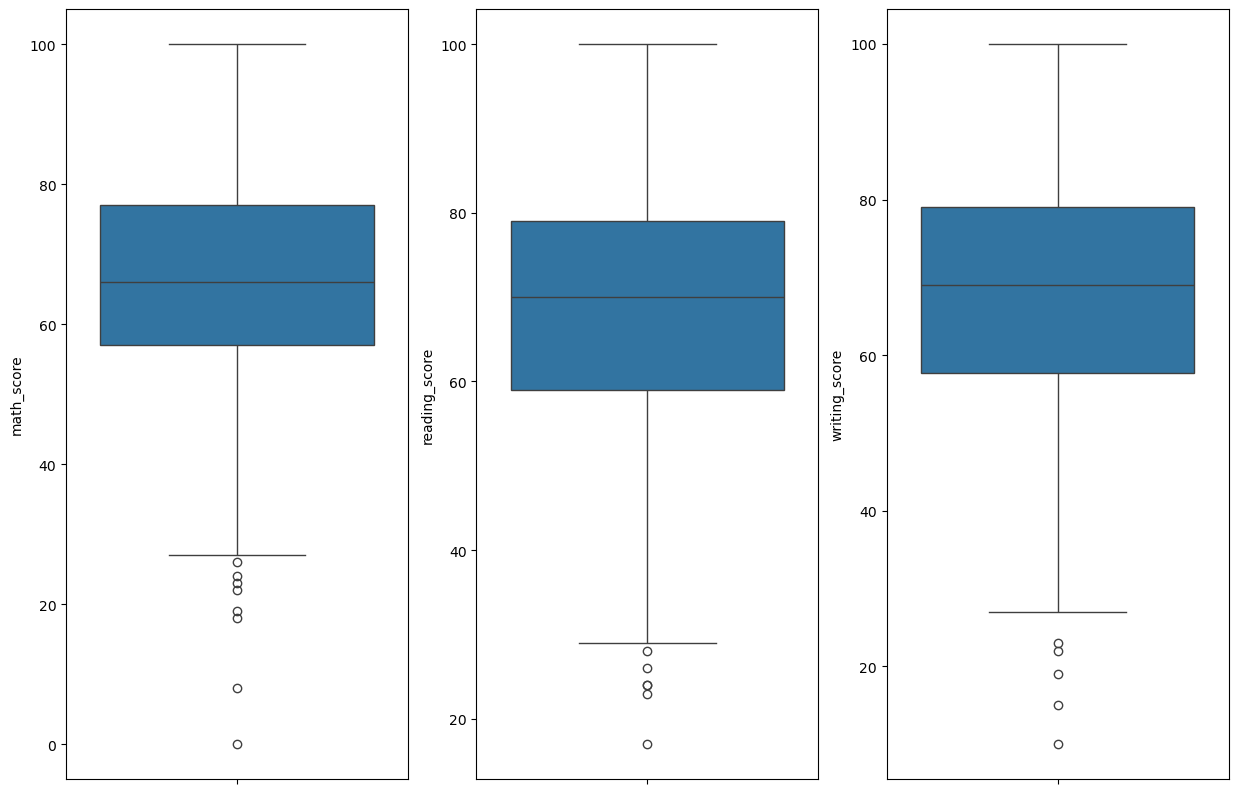

In [14]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 10))
sns.boxplot(data = df , ax = axes[0] , y = "math_score")
sns.boxplot(data = df , ax = axes[1] , y = "reading_score")
sns.boxplot(data = df , ax = axes[2] , y = "writing_score")

In [15]:
df.isnull().sum()

gender                0
race                  0
parental_education    0
lunch                 0
test_preparation      0
math_score            0
reading_score         0
writing_score         0
dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
df.shape

(1000, 8)

In [18]:
df.ndim

2

In [20]:
def IQR_outlier(df , feature):
    q1 = np.percentile(df[feature] , 25)
    q3 = np.percentile(df[feature] , 75)

    iqr = q3 - q1

    lower_bound = q1  - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[feature] >= lower_bound) & ( df[feature] <= upper_bound)]
    return df

df = IQR_outlier(df , "math_score")
df = IQR_outlier(df , "reading_score")
df = IQR_outlier(df , "writing_score")

<Axes: ylabel='writing_score'>

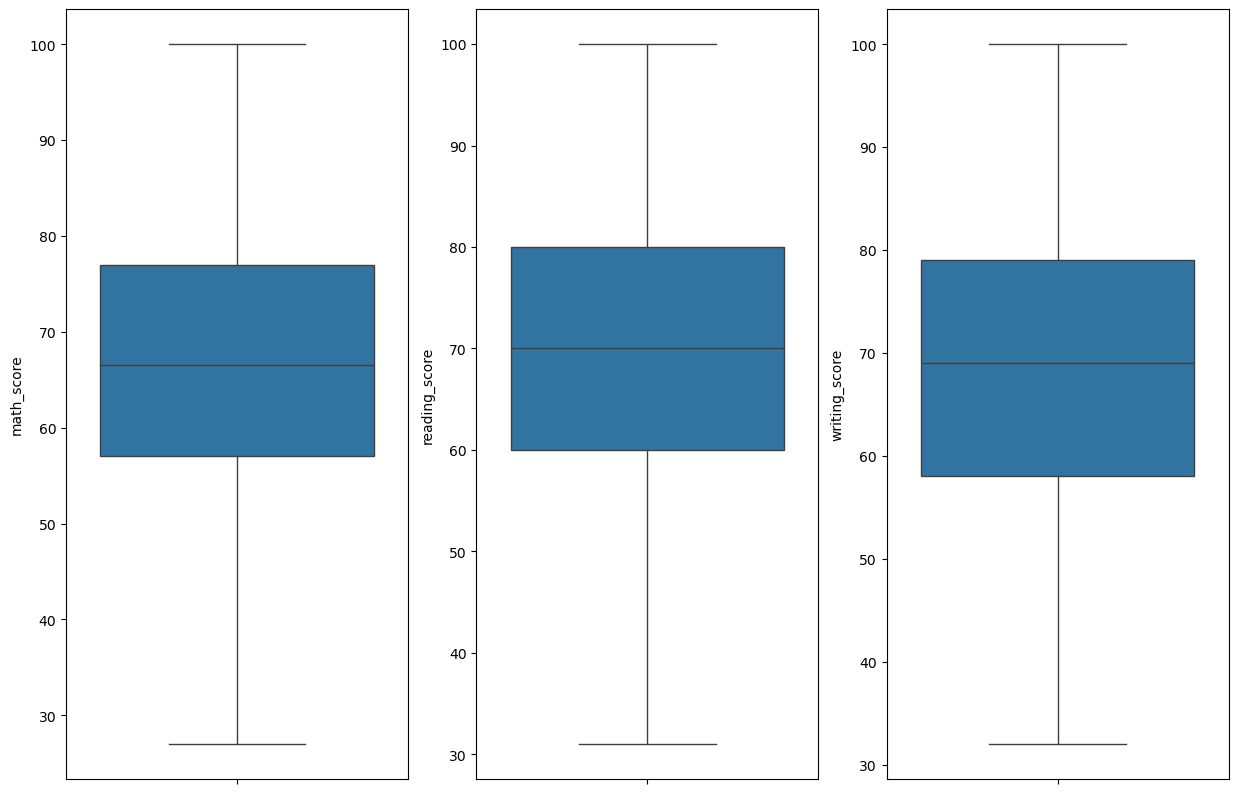

In [21]:
fig , axes = plt.subplots(1 , 3 , figsize = (15 , 10))
sns.boxplot(data = df , ax = axes[0] , y = "math_score")
sns.boxplot(data = df , ax = axes[1] , y = "reading_score")
sns.boxplot(data = df , ax = axes[2] , y = "writing_score")

In [22]:
df["math_score"].min()

27

In [25]:
def min_max_normalization(df , feature):
    mini = df[feature].min()
    maxi = df[feature].max()

    df[feature] = (df[feature] - mini) / (maxi - mini)
    return df

df = min_max_normalization(df , "math_score")
df = min_max_normalization(df , "reading_score")
df = min_max_normalization(df , "writing_score")

In [26]:
df["math_score"].min()

0.0

In [27]:
df.dtypes

gender                 object
race                   object
parental_education     object
lunch                  object
test_preparation       object
math_score            float64
reading_score         float64
writing_score         float64
dtype: object

In [28]:
df["race"].value_counts()

race
group C    315
group D    261
group B    183
group E    139
group A     88
Name: count, dtype: int64

In [29]:
df["parental_education"].value_counts()

parental_education
some college          222
associate's degree    221
high school           191
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [30]:
df["lunch"].value_counts()

lunch
standard        642
free/reduced    344
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["math_score"] = label_encoder.fit_transform(df["math_score"])
df["reading_score"] = label_encoder.fit_transform(df["reading_score"])
df["writing_score"] = label_encoder.fit_transform(df["writing_score"])
df["test_preparation"] = label_encoder.fit_transform(df["test_preparation"])
df["parental_education"] = label_encoder.fit_transform(df["parental_education"])
df["lunch"] = label_encoder.fit_transform(df["lunch"])


df.head()


,gender,race,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,1,1,1,42,36,42
1,female,group C,4,1,0,39,54,56
2,female,group B,3,1,1,60,59,61
3,male,group A,0,0,1,17,21,12
4,male,group C,4,1,1,46,42,43
